In [1]:
import pybamm;import numpy as np;import os;import matplotlib.pyplot as plt;import os;#import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp,sqrt;
import matplotlib as mpl; 
fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl
import traceback
import multiprocessing;import pandas as pd   ;
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

In [2]:
# Read cell-1 and 2 from 0.5C to 4C - done by Ruihe, calanedar age aleady ~98.36% at 0.5C
# Read Cell-1 2.5C to 3C:
BasicPath = "C:/Users/rl1120/OneDrive - Imperial College London/SimDataSave/InputData/" 
Target = "Ruihe_newLGM50_Crate/"
Cell_1_2p5to3C = pd.read_csv(
    BasicPath + Target + "dicharge_2.5C_3C_ch_a_1_CA1.txt", #engine='python',
    encoding = "shift-jis",  skiprows = 1,
    sep ='\t', header=None)
Cell_1_2p5to3C.head()
newNames = [
    "time/s", "Ns","Ecell/V", "I/mA", 
    "(Q-Qo)/mA.h", "Temperature/ｰC", 
    "Q charge/mA.h","Q discharge/mA.h","R/Ohm"]
oldNames = np.arange(9).tolist()
Cell_1_2p5to3C=Cell_1_2p5to3C.rename(columns={i:j for i,j in zip(oldNames,newNames)})
Cell_1_2p5to3C.head()
# Get Cell-1 2.5C and 3C:
font = {'family' : 'DejaVu Sans','size'   : 14};   mpl.rc('font', **font)
Cell_1_2p5C = Cell_1_2p5to3C[(Cell_1_2p5to3C['Ns']==5)]
df_dc4 = Cell_1_2p5to3C[(Cell_1_2p5to3C['Ns']==12)]
Cell_1_3C = Cell_1_2p5to3C[(Cell_1_2p5to3C['Ns']==12)]
# Read Cell-2 2.5C to 3C:
BasicPath = "C:/Users/rl1120/OneDrive - Imperial College London/SimDataSave/InputData/" 
Target = "Ruihe_newLGM50_Crate/"
Cell_2_2p5to3C = pd.read_csv(
    BasicPath + Target + "dicharge_2.5C_3C_ch_a_2_CA2.txt", #engine='python',
    encoding = "shift-jis",  skiprows = 1,
    sep ='\t', header=None)
Cell_2_2p5to3C.head()
newNames = [
    "time/s", "Ns","Ecell/V", "I/mA", 
    "(Q-Qo)/mA.h", "Temperature/ｰC", 
    "Q charge/mA.h","Q discharge/mA.h","R/Ohm"]
oldNames = np.arange(9).tolist()
Cell_2_2p5to3C=Cell_2_2p5to3C.rename(columns={i:j for i,j in zip(oldNames,newNames)})
Cell_2_2p5to3C.head()
Cell_2_2p5C = Cell_2_2p5to3C[(Cell_2_2p5to3C['Ns']==5)]
df_dc4 = Cell_2_2p5to3C[(Cell_2_2p5to3C['Ns']==12)]
Cell_2_3C = Cell_2_2p5to3C[(Cell_2_2p5to3C['Ns']==12)]
# Read Cell-1 3.5C to 4C:
BasicPath = "C:/Users/rl1120/OneDrive - Imperial College London/SimDataSave/InputData/" 
Target = "Ruihe_newLGM50_Crate/"
Cell_1_3p5to4C = pd.read_csv(
    BasicPath + Target + "Discharge_test_3p5_to_4C_A1_CA1.txt", #engine='python',
    encoding = "shift-jis",  skiprows = 1,
    sep ='\t', header=None)
Cell_1_3p5to4C.head()
newNames = [
    "time/s", "Ns","Ecell/V", "I/mA", 
    "(Q-Qo)/mA.h", "Temperature/ｰC", 
    "Q charge/mA.h","Q discharge/mA.h","R/Ohm"]
oldNames = np.arange(9).tolist()
Cell_1_3p5to4C=Cell_1_3p5to4C.rename(columns={i:j for i,j in zip(oldNames,newNames)})
Cell_1_3p5to4C.head()
Cell_1_3p5C = Cell_1_3p5to4C[(Cell_1_3p5to4C['Ns']==5)]
df_dc4 = Cell_1_3p5to4C[(Cell_1_3p5to4C['Ns']==12)]
Cell_1_4C = Cell_1_3p5to4C[(Cell_1_3p5to4C['Ns']==12)]
# Read Cell-2 3.5C to 4C:
BasicPath = "C:/Users/rl1120/OneDrive - Imperial College London/SimDataSave/InputData/" 
Target = "Ruihe_newLGM50_Crate/"
Cell_2_3p5to4C = pd.read_csv(
    BasicPath + Target + "Discharge_test_3p5_to_4C_A2_CA3.txt", #engine='python',
    encoding = "shift-jis",  skiprows = 1,
    sep ='\t', header=None)
Cell_2_3p5to4C.head()
newNames = [
    "time/s", "Ns","Ecell/V", "I/mA", 
    "(Q-Qo)/mA.h", "Temperature/ｰC", 
    "Q charge/mA.h","Q discharge/mA.h","R/Ohm"]
oldNames = np.arange(9).tolist()
Cell_2_3p5to4C=Cell_2_3p5to4C.rename(columns={i:j for i,j in zip(oldNames,newNames)})
Cell_2_3p5to4C.head()
Cell_2_3p5C = Cell_2_3p5to4C[(Cell_2_3p5to4C['Ns']==5)]
df_dc4 = Cell_2_3p5to4C[(Cell_2_3p5to4C['Ns']==12)]
Cell_2_4C = Cell_2_3p5to4C[(Cell_2_3p5to4C['Ns']==12)]
# Read Cell-2 up to 2C:
BasicPath = "C:/Users/rl1120/OneDrive - Imperial College London/SimDataSave/InputData/" 
Target = "Ruihe_newLGM50_Crate/"
Cell_2_UpTo2C = pd.read_csv(
    BasicPath + Target + "dicharge_to_2C_ch_a_2_CA2.txt", #engine='python',
    encoding = "shift-jis",  skiprows = 1,
    sep ='\t', header=None)
Cell_2_UpTo2C.head()
newNames = [
    "time/s", "Ns","Ecell/V", "I/mA", 
    "(Q-Qo)/mA.h", "Temperature/ｰC", 
    "Q charge/mA.h","Q discharge/mA.h","R/Ohm"]
oldNames = np.arange(9).tolist()
Cell_2_UpTo2C=Cell_2_UpTo2C.rename(columns={i:j for i,j in zip(oldNames,newNames)})
Cell_2_UpTo2C.head()

Cell_2_0p5C = Cell_2_UpTo2C[(Cell_2_UpTo2C['Ns']==5)]
Cell_2_1C = Cell_2_UpTo2C[(Cell_2_UpTo2C['Ns']==12)]
Cell_2_1p25C = Cell_2_UpTo2C[(Cell_2_UpTo2C['Ns']==19)]
Cell_2_1p5C = Cell_2_UpTo2C[(Cell_2_UpTo2C['Ns']==26)]
Cell_2_1p75C = Cell_2_UpTo2C[(Cell_2_UpTo2C['Ns']==33)]
Cell_2_2C = Cell_2_UpTo2C[(Cell_2_UpTo2C['Ns']==40)]
# Read Cell-1 up to 2C:
BasicPath = "C:/Users/rl1120/OneDrive - Imperial College London/SimDataSave/InputData/" 
Target = "Ruihe_newLGM50_Crate/"
Cell_1_UpTo2C = pd.read_csv(
    BasicPath + Target + "dicharge_to_2C_ch_a_1_CA1.txt", #engine='python',
    encoding = "shift-jis",  skiprows = 1,
    sep ='\t', header=None)
Cell_1_UpTo2C.head()
newNames = [
    "time/s", "Ns","Ecell/V", "I/mA", 
    "(Q-Qo)/mA.h", "Temperature/ｰC", 
    "Q charge/mA.h","Q discharge/mA.h","R/Ohm"]
oldNames = np.arange(9).tolist()
Cell_1_UpTo2C=Cell_1_UpTo2C.rename(columns={i:j for i,j in zip(oldNames,newNames)})
Cell_1_UpTo2C.head()

Cell_1_0p5C = Cell_1_UpTo2C[(Cell_1_UpTo2C['Ns']==5)]
Cell_1_1C = Cell_1_UpTo2C[(Cell_1_UpTo2C['Ns']==12)]
Cell_1_1p25C = Cell_1_UpTo2C[(Cell_1_UpTo2C['Ns']==19)]
Cell_1_1p5C = Cell_1_UpTo2C[(Cell_1_UpTo2C['Ns']==26)]
Cell_1_1p75C = Cell_1_UpTo2C[(Cell_1_UpTo2C['Ns']==33)]
Cell_1_2C = Cell_1_UpTo2C[(Cell_1_UpTo2C['Ns']==40)]
# collect all together
Cell_2_All = [
    Cell_2_0p5C,Cell_2_1C,Cell_2_1p25C,Cell_2_1p5C,Cell_2_1p75C,
    Cell_2_2C,Cell_2_2p5C,Cell_2_3C,Cell_2_3p5C,Cell_2_4C];
Cell_1_All = [
    Cell_1_0p5C,Cell_1_1C,Cell_1_1p25C,Cell_1_1p5C,Cell_1_1p75C,
    Cell_1_2C,Cell_1_2p5C,Cell_1_3C,Cell_1_3p5C,Cell_1_4C];
str_Crate = ["0.5","1","1.25","1.5","1.75","2","2.5","3","3.5","4",]

C:\Users\rl1120\AppData\Local\Temp\ipykernel_15884\296680862.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = mpl.cm.get_cmap("cool", 10)
C:\Users\rl1120\AppData\Local\Temp\ipykernel_15884\296680862.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  gray = mpl.cm.get_cmap("gray", 10)


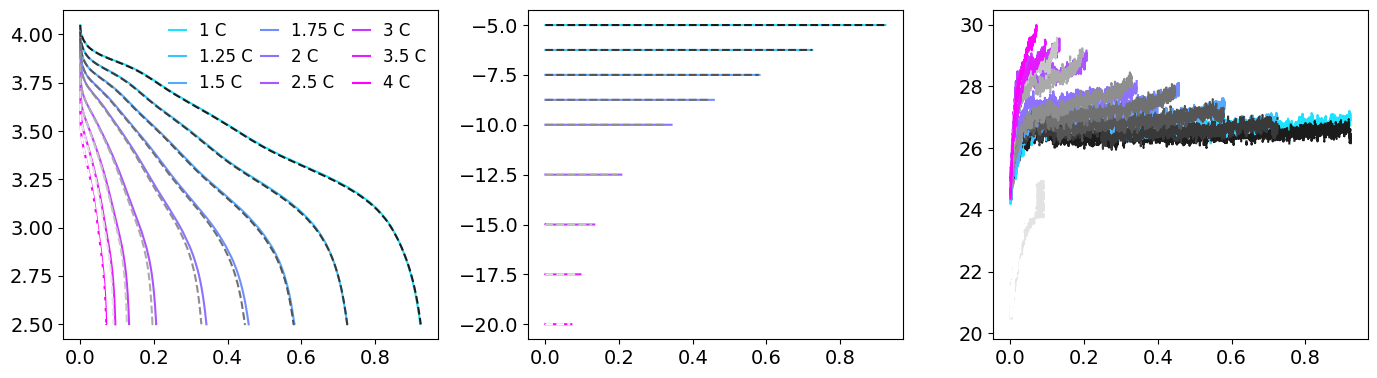

In [4]:
# plot them all
cm = mpl.cm.get_cmap("cool", 10)  
gray = mpl.cm.get_cmap("gray", 10)  

fig, axs = plt.subplots(1,3, figsize=(14,4),tight_layout=True)
for i in np.arange(1,10,1):
    axs[0].plot((Cell_1_All[i]["time/s"]-Cell_1_All[i]["time/s"].iloc[0])/3600,Cell_1_All[i]["Ecell/V"],linestyle='-',color=cm(i),label=f"{str_Crate[i]} C")
    axs[1].plot((Cell_1_All[i]["time/s"]-Cell_1_All[i]["time/s"].iloc[0])/3600,Cell_1_All[i]["I/mA"]/1e3, linestyle='-',color=cm(i))
    axs[2].plot((Cell_1_All[i]["time/s"]-Cell_1_All[i]["time/s"].iloc[0])/3600,Cell_1_All[i]["Temperature/ｰC"], linestyle='-',color=cm(i))
    axs[0].plot((Cell_2_All[i]["time/s"]-Cell_2_All[i]["time/s"].iloc[0])/3600,Cell_2_All[i]["Ecell/V"],linestyle='--',color=gray(i),)
    axs[1].plot((Cell_2_All[i]["time/s"]-Cell_2_All[i]["time/s"].iloc[0])/3600,Cell_2_All[i]["I/mA"]/1e3, linestyle='--',color=gray(i))
    axs[2].plot((Cell_2_All[i]["time/s"]-Cell_2_All[i]["time/s"].iloc[0])/3600,Cell_2_All[i]["Temperature/ｰC"], linestyle='--',color=gray(i))
   
axs[0].legend(prop={'family':'DejaVu Sans','size':fs-5},
    loc='best',ncol=3,frameon=False,markerscale=1,borderpad=0.2,handlelength=1.0,columnspacing=0.5)
    # # # # # handlelength=1.5 legend示意线长度， 默认是2；columnspacing顾名思义，默认是2；改这两个可以节约空间！

In [104]:
tt = (Cell_1_All[0]["time/s"]-Cell_1_All[0]["time/s"].iloc[0])/3600
print(tt.iloc[-1]*2.5)
print(tt.iloc[-1]*2.5/4.8*100)

4.721486335369668
98.36429865353475


In [103]:
tt = (Cell_2_All[0]["time/s"]-Cell_2_All[0]["time/s"].iloc[0])/3600
print(tt.iloc[-1]*2.5)

4.7210196686808334
